## __Random Forest__

Este ha sido nuestro modelo ganador, con las mejores métricas y una predicción de aciertos de accidentes mortales del 78 %. Abajo hemos ajustado los hiperparámetros del modelo. No hemos añadido el modelo en la entrega puesto que tiene un peso de 2.7 GB.

####  __Autores__: 
####  - González Díaz, Guillermo
  
####  - Sebastiani, Carlos

In [1]:
# Importamos algunas librerías
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, roc_curve, recall_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from aux_func import print_metrics, matriz_confusion, curva_roc, curva_pr, ganancia, curva_lift, matriz_confusion_optimizada, print_metrics_optimized

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargamos los data sets y los ponemos en el formato correcto
X_train = pd.read_parquet('../PreprocessingSampled2/X_trainSampled2')
X_test = pd.read_parquet('../PreprocessingSampled2/X_test')
y_train=pd.read_parquet('../PreprocessingSampled2/y_trainSampled2')
y_test=pd.read_csv('../PreprocessingSampled2/y_test').set_index('Unnamed: 0')

In [4]:
# Cargamos el modelo:
filename = '../modelos/randomforest.sav'
rfc = joblib.load(filename)

## __No correr la siguiente celda si el modelo se ha cargado correctamente__

In [6]:
# Modelo
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Guardamos el modelo
#filename = '../modelos/randomforest.sav'
#joblib.dump(rfc, filename)

['../modelos/randomforest.sav']

In [5]:
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)

## Métricas

Podemos ver que nuestras métricas son las mejores de todos los modelos, por eso ha sido nuestro ganador.
- Respecto a la __matriz de confusiones__ vemos que los aciertos de 1s es el más elevado, con un 78 %. Nos interesaba sobre todo esto, pues es el objetivo del trabajo. Solamente en un 22% de los casos decimos que no habrá víctimas mortales y si las hay realmente. 
- En la __curva ROC__ nos muestra una relación entre TPF (true positive rate) y FPR (false positive rate), cuanto más alta sea y más se aproxime al extremo superior izquierdo, mejor es el performance de nuestro modelo. Puesto que, por ejemplo en este caso, con un 0.8 de True Positives solamente tenemos un 0.2 de False Positives.
- La __curva pr__ no tiene una caída tan pronunciada como en los otros modelos. Y a medida que queremos coger más 1s del total, la predición no cae tan rápidamente. Cuanta más área haya debajo de la línea naranja significa que nuestro modelo pierde menos precisión a medida que aumentamos el tamaño y conseguimos más recall.
- Con la __curva de ganancia acumulada__, vemos que cuanto más grande sea el área que deja abajo significa que con poco porcentaje de la muestra consigue muchos 1s, y nuevamente esta es la mejor curva que hemos conseguido.
- El __lift__ lo entendemos como el ratio de un punto de nuestra muestra, dividido por el ratio de 1s de todo el dataset. Cuanto más alto sea el valor del punto extremo izquierdo de nuestra recta, mejor es nuestro modelo, puesto que que nos encontramos con un montón de 1s en la proporción de nuestra población que tiene altas probabilidades de ser 1. 


In [6]:
print_metrics(y_test, y_pred)

------------------------------------------
The accuracy score is:  0.984
------------------------------------------
The F1 score is:  0.597
------------------------------------------
The recall is:  0.195
------------------------------------------
The precision score is:  0.616


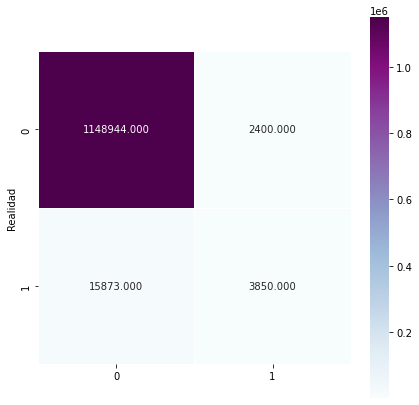

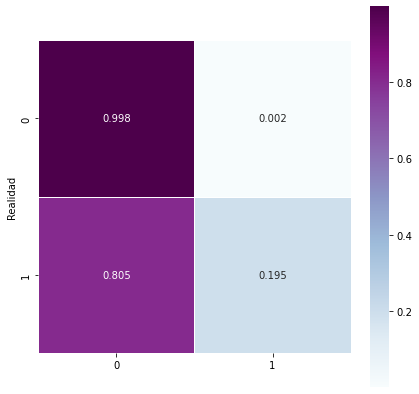

In [8]:
matriz_confusion(y_test, y_pred)

curva_roc(y_test,y_pred_proba)

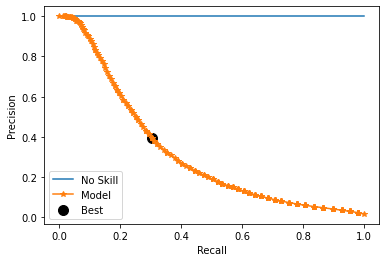

In [8]:
curva_pr(y_test, y_pred_proba)

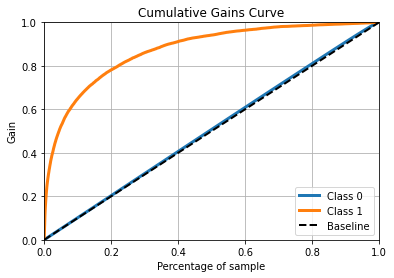

In [7]:
ganancia(rfc, y_test, y_pred_proba, X_test)

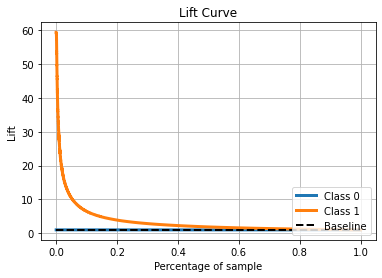

In [9]:
curva_lift(rfc, y_test, y_pred_proba, X_test) 

### Ajustando el threshold: --------------------------------------------------------------------------

- Ajustamos el threshold para quedarnos con todos aquellos valores que predice por encima del punto óptimo de nustra curva ROC. Vemos como métricas como el recall han mejorado considerablemente y es lo que nos interesa, pues del total hemos cogido más 1s sacrificando para ello más 0s. Es por esto último que la precisión ha bajado considerablemente, por ese motivo ahora los __falsos positivos__ han pasado de valer solamente un 0.002 a  0.188. 

- El __recall__ ha aumentado notablemente y con ello los verdaderos positivos, pasando de un 0.195 a un 0.780 a costa de perder un poco de verdaderos negativos, pero esta pérdida ha sido peor que con otros modelos, por eso nos hemos quedado con este.

- El __F1__ también se muestra más próximo a 1, con 0.88. Es una medida que combina el precision y recall y cuanto más cercana a 1, mejor.

In [7]:
# Nuevas métricas:
print_metrics_optimized(rfc, X_test, y_test, y_pred_proba)

------------------------------------------
The accuracy score is:  0.811
------------------------------------------
The F1 score is:  0.88
------------------------------------------
The recall is:  0.78
------------------------------------------
The precision score is:  0.066


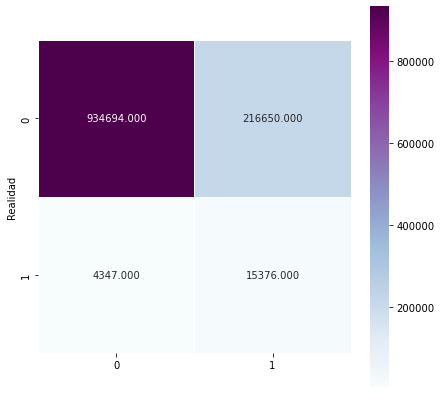

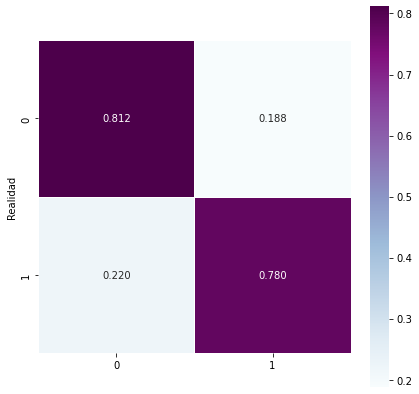

In [6]:
# Nueva matriz de confusiones:
matriz_confusion_optimizada(rfc, X_test, y_test, y_pred_proba)

__Hemos intentado mejorar los hiperparámetros del modelo, pero los resultados nos salían peores. Luego hemos intentado con los siguientes hiperparámetros y nuestros ordenadores no han sido capaces de correrlo__:

In [8]:
rf = RandomForestClassifier()

In [9]:
# Optimizamos los hiperparámetros
param_grid = { 
    'n_estimators': [150, 500], 
    'max_features': ['auto'], 
    'max_depth' : [5, 10], 
    'criterion' :['gini','entropy']} 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

CV = RandomizedSearchCV(rf, param_grid, cv=5, random_state=0, n_jobs=2)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

/Users/guillemrogonzalezdiaz/miniconda3/envs/practica_ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/guillemrogonzalezdiaz/miniconda3/envs/practica_ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/guillemrogonzalezdiaz/miniconda3/envs/practica_ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Use

/Users/guillemrogonzalezdiaz/miniconda3/envs/practica_ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/guillemrogonzalezdiaz/miniconda3/envs/practica_ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/guillemrogonzalezdiaz/miniconda3/envs/practica_ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Use

KeyboardInterrupt: 